## Sentiment Analysis for Movie's Reviews
* Project Based on the Kaggle Competition "Bag of Words Meets Bags of Popcorn"

### Ideas:
* #### Predict the sentiment for each review on testData
* #### Assign sentiment to each review on unlabeledTrainData (unsupervised learning).
* #### Explore classification of people based on review and sentiment.

**Data Set **
* The data set consists of 100,000 IMDB movie reviews, specially selected for sentiment analysis. 
* The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. 
* No individual movie has more than 30 reviews.
* The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. 
* In addition, there are another 50,000 IMDB reviews provided without any rating labels.

** File descriptions **
* **labeledTrainData** The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  
* **testData** The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review.
* **unlabeledTrainData** The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 

** Data fields **
* **id** - Unique ID of each review
* **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* **review** - Text of the review


### Homework #2 Feedback
* You've obviously had lots of fun with natural language processing part of this course!
* I think I would have wanted to see some attempt at regression. For example, are longer reviews more positive? What about longer sentences?
* I'm guessing that if you grouped movies by their genre that you might see some interesting patterns. e.g. "thinking" movie reviews might correlate well with the sophistication of the language used in the review.

In [16]:
# Importing all the libraries and tools to be used
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

import nltk
import sklearn.linear_model
import textblob

In [17]:
# Loading Data Sets using Pandas
train_data = pd.read_csv('labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
test_data = pd.read_csv('testData.tsv', header=0, delimiter="\t", quoting=3)
unlabeled_train_data = pd.read_csv('unlabeledTrainData.tsv', header=0, delimiter="\t", quoting=3)

In [18]:
# Visually inspecting the Data Sets

train_data.head()
train_data.sentiment.value_counts()

test_data.head()

unlabeled_train_data.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


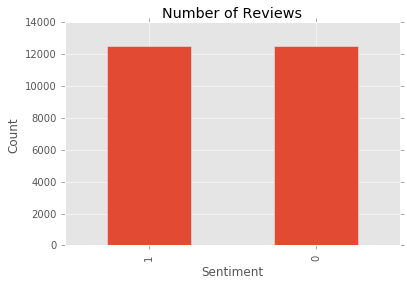

In [19]:
# Visualising to see distribution of sentiment on training data
train_data.sentiment.value_counts().plot(kind='bar', title='Number of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1189df9d0>]], dtype=object)

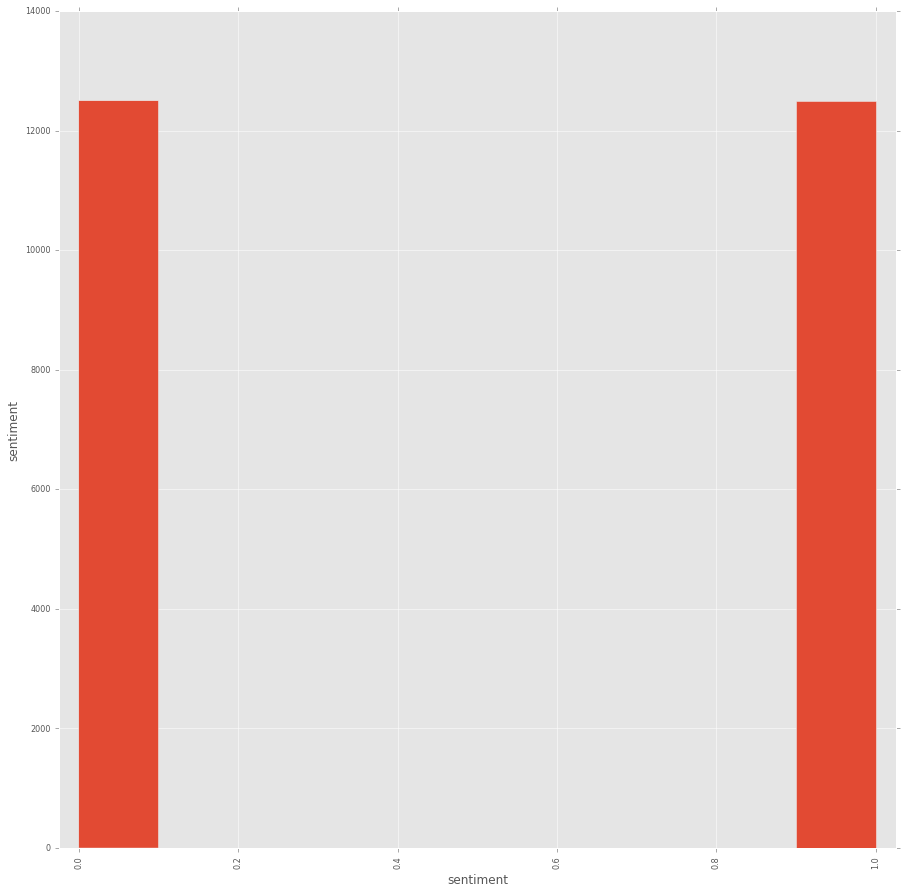

In [20]:
# Performing a Scatter Matrix on the Train Data
pd.scatter_matrix(train_data, figsize=(15,15))

In [21]:
# Further checking each Data Set
test_data.index
test_data.dtypes 
test_data.shape
test_data.info

train_data.index
train_data.dtypes 
train_data.shape
train_data.info

unlabeled_train_data.index
unlabeled_train_data.dtypes 
unlabeled_train_data.shape
unlabeled_train_data.info

<bound method DataFrame.info of               id                                             review
0       "9999_0"  "Watching Time Chasers, it obvious that it was...
1      "45057_0"  "I saw this film about 20 years ago and rememb...
2      "15561_0"  "Minor Spoilers<br /><br />In New York, Joan B...
3       "7161_0"  "I went to see this film with a great deal of ...
4      "43971_0"  "Yes, I agree with everyone on this site this ...
5      "36495_0"  "Jennifer Ehle was sparkling in \"Pride and Pr...
6      "49472_0"  "Amy Poehler is a terrific comedian on Saturda...
7      "36693_0"  "A plane carrying employees of a large biotech...
8        "316_0"  "A well made, gritty science fiction movie, it...
9      "32454_0"  "Incredibly dumb and utterly predictable story...
10     "37128_0"  "After reading the comments for this movie, I ...
11     "19439_0"  "It's hard to describe Elfen Lied to someone w...
12     "10760_0"  "Of all the bile-inducing vomitoriums to squee...
13     "15073_0"

In [22]:
# Cheking one review of the train data
train_data["review"][18765]

'"I saw this film yesterday. I must admit, it weren\'t my cup of tea. Although it\'s supposed to be a horror movie of its kind. But as I was watching this, I was thinking.. \'This movie isn\'t making any sense at all..\' Where on earth did this guy in the dark coat came from? Where were the two guys were going when they left the girls behind? Where on earth did a shark came out from?<br /><br />All these elements in this film somehow didn\'t add up. I felt as if these filmmakers wasted so much time and money on a film that was so bound to be so crap.<br /><br />I\'ve seen many good horror movies in my time, but this is one of the most worst horror flicks I\'ve seen. At the end of the movie, I said to myself that I wouldn\'t watch it again.. So much pappy show in this film, I\'ve decided to give it the thumbs down! Count me out on this one! 0 out of 10!"'

In [23]:
# Checking one review of the test data
test_data["review"][345]

'"Note to self. Never ever ever again watch a serious movie with Charlie Sheen in it. Great comedian, horrible seal. This movie makes Navy SEALS look like a reckless group of rangers when, in fact, they are the most elite form of military in the world. Charlie Sheen helps destroy the Navy SEAL reputation. Thank you for making such an incredibly select group of individuals look awful in one of the worst action movies I have ever seen. This is a great story which could be made into an amazing action movie, but why Charlie Sheen? There are possibilities for a very passionate story here, but Sheen decides to wreck them with \\"funny\\" comments."'

In [24]:
# Checking one review of the unlabeled train data
unlabeled_train_data["review"][12500]

'"Providence, Rhode Island, and in particular its neighbourhood of the title, serves as but one among many interesting personalities in this well-wrought feature film debut of its director/scriptor Michael Corrente. Completed in less than one month and having a sparse budget, the skillfully edited work benefits from a forcefully driven narrative that includes several parallel plot strings. Five Italian-American friends share the major portion of the scenario, with brothers Ralphie (Nicholas Turturro) and Nicky (Anthony DeSando) having their close relationship jeopardized by the latter\'s romantic involvement with a Brown University co-ed. At the same time, their cousin Bobby (Jason Andrews) finds himself dangerously in debt and when collection time nears, Ralphie agrees to help him raise the needed cash through an ingenious and illicit scheme. Based upon an early single act play by Corrente, later expanded to a full-length piece, \\"Ledge Street\\", this production displays a strong mo

In [25]:
# Further checking each Data Set with describe
test_data.describe(include='all')
train_data.describe(include='all')
unlabeled_train_data.describe(include='all')

,id,review
count,50000,50000
unique,50000,49507
top,"""25020_0""","""Am not from America, I usually watch this sho..."
freq,1,5


In [26]:
#Checking data set to see if there is any empty value
train_data.head()
train_data[train_data.id.isnull() == True]
train_data[train_data.sentiment.isnull() == True]
train_data[train_data.review.isnull() == True]

test_data.head()
test_data[train_data.id.isnull() == True]
test_data[train_data.review.isnull() == True]

unlabeled_train_data.head()
unlabeled_train_data[unlabeled_train_data.id.isnull() == True]
unlabeled_train_data[unlabeled_train_data.review.isnull() == True]

,id,review


In [27]:
# Gathering positive review in separate Data Set
# Also getting a positive review sample

# I am not too sure about this idea 26-07-2016

positive_review_train_data = train_data[train_data.sentiment == 1]
positive_review_train_data
pos_review_train_sample = positive_review_train_data.review[2000]
pos_review_train_sample

'"I got a free pass to a preview of this movie last night and didn\'t know what to expect. The premise seemed silly and I assumed it would be a lot of shallow make-fun-of-the-virgin humor. What a great surprise. I laughed so hard I cried at some of the jokes. This film is a must see for anyone with an open mind and a slightly twisted sense of humor. OK.....this is not a movie to go to with your grandmother (Jack Palance?) or small children. The language is filthy, the jokes are (very) crude, and the sex talk is about as graphic as you\'ll find anywhere. What\'s amazing, however, is that the movie is still a sweet love story. My girlfriend and I both loved it. Steve Carell is terrific, but (like The Office) the supporting cast really makes the film work. All of the characters have their flaws, but they also have depth and likability. Everyone pulls their weight and the chemistry is perfect. I can\'t wait to get the DVD. I\'m sure it will be up there with Office Space for replays and quo

## Attempts to perform some Classifications (Homework #3)

In [28]:
#Further checking each Data Set
train_data.review.describe()
train_data.shape

test_data.review.describe()
test_data.shape

unlabeled_train_data.describe()
unlabeled_train_data.shape

(50000, 2)

In [29]:
# Instantiate Count Vectorizer
# Learn the Review Vocabulary of the Training Data

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', decode_error = 'ignore')
bag_of_words_train = count_vect.fit_transform(train_data['review'])
bag_of_words_train

<25000x74539 sparse matrix of type '<type 'numpy.int64'>'
	with 2241864 stored elements in Compressed Sparse Row format>

In [31]:
# Checking the output of Training Bag
bag_of_words_train.todense().shape

# Vocabulary words
count_vect.get_feature_names()

[u'00',
 u'000',
 u'0000000000001',
 u'00001',
 u'00015',
 u'000s',
 u'001',
 u'003830',
 u'006',
 u'007',
 u'0079',
 u'0080',
 u'0083',
 u'0093638',
 u'00am',
 u'00pm',
 u'00s',
 u'01',
 u'01pm',
 u'02',
 u'020410',
 u'029',
 u'03',
 u'04',
 u'041',
 u'05',
 u'050',
 u'06',
 u'06th',
 u'07',
 u'08',
 u'087',
 u'089',
 u'08th',
 u'09',
 u'0f',
 u'0ne',
 u'0r',
 u'0s',
 u'10',
 u'100',
 u'1000',
 u'1000000',
 u'10000000000000',
 u'1000lb',
 u'1000s',
 u'1001',
 u'100b',
 u'100k',
 u'100m',
 u'100min',
 u'100mph',
 u'100s',
 u'100th',
 u'100x',
 u'100yards',
 u'101',
 u'101st',
 u'102',
 u'102nd',
 u'103',
 u'104',
 u'1040',
 u'1040a',
 u'1040s',
 u'105',
 u'1050',
 u'105lbs',
 u'106',
 u'106min',
 u'107',
 u'108',
 u'109',
 u'10am',
 u'10lines',
 u'10mil',
 u'10min',
 u'10minutes',
 u'10p',
 u'10pm',
 u'10s',
 u'10star',
 u'10th',
 u'10x',
 u'10yr',
 u'11',
 u'110',
 u'1100',
 u'11001001',
 u'1100ad',
 u'111',
 u'112',
 u'1138',
 u'114',
 u'1146',
 u'115',
 u'116',
 u'117',
 u'11f',
 u'

In [33]:
# Splitting the Train Data (Labeled)
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bag_of_words_train,train_data['sentiment'], random_state=100,test_size=0.2)

In [34]:
# Instantiating a Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB().fit(X_train, y_train)

In [35]:
#See the score on the Train Data Generated by Cross-Validation
NB_classifier.score(X_test,y_test)

0.85580000000000001

### Other Classifiers

In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
DT_classifier.score(X_test,y_test)


0.73640000000000005

In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(5).fit(X_train, y_train)
KNN_classifier.score(X_test,y_test)

0.59060000000000001

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

LR = LogisticRegression(C=1)

cross_val_score(LR,X_test,y_test,cv=10)

cross_val_score(LR,X_test,y_test,cv=10).mean()

0.85221163364653463

In [40]:
y_test.value_counts()

1    2543
0    2457
Name: sentiment, dtype: int64

### Futher Exploring
### Let us work on Test Data (not generated through Cross-Validation)

In [41]:
# Exploring the wrong predcitions
wrong_predictions = []
for predicted,test,i in zip(NB_classifier.predict(X_test),y_test.values,y_test.index):
    if predicted==test:
        pass
    else:
        wrong_predictions.append(i)
wrong_predictions

[15893,
 23132,
 2043,
 15994,
 2363,
 19758,
 24712,
 20762,
 7954,
 8059,
 5920,
 22082,
 185,
 12148,
 6499,
 21274,
 14596,
 11905,
 22097,
 18357,
 10535,
 11995,
 7234,
 5852,
 10003,
 17252,
 11916,
 22917,
 5809,
 24709,
 12563,
 3049,
 22952,
 1671,
 21861,
 13446,
 7930,
 9125,
 13544,
 18195,
 19063,
 2415,
 18668,
 7366,
 16539,
 15248,
 14627,
 7510,
 19378,
 4704,
 7231,
 961,
 2623,
 24623,
 16723,
 15419,
 14205,
 10520,
 8853,
 11517,
 5037,
 16283,
 17415,
 4361,
 6501,
 7239,
 8433,
 2518,
 9629,
 4401,
 5596,
 23592,
 24989,
 18744,
 15041,
 9698,
 6427,
 22166,
 20521,
 6971,
 565,
 7368,
 10690,
 14684,
 11270,
 10688,
 22533,
 1197,
 18421,
 10529,
 11572,
 13317,
 4569,
 7766,
 15846,
 16461,
 8268,
 3246,
 8529,
 7627,
 11951,
 4744,
 7162,
 2494,
 735,
 22150,
 4866,
 14392,
 14692,
 11744,
 11822,
 15947,
 7416,
 17635,
 19596,
 15793,
 14885,
 22193,
 17383,
 52,
 20008,
 7837,
 10936,
 7554,
 12839,
 981,
 22629,
 17351,
 14105,
 12192,
 17450,
 21729,
 150

In [42]:
train_data.loc[wrong_predictions]
wrong_predictions_df = train_data.loc[wrong_predictions]

In [43]:
wrong_predictions_df.loc[7279]['sentiment']

0

In [44]:
wrong_predictions_df.loc[7279]['review']

'"Un-bleeping-believable! Meg Ryan doesn\'t even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"'

In [45]:
# Checking the Classification Report and Confussion Matrix
from sklearn.metrics import metrics

print metrics.classification_report(y_test,NB_classifier.predict(X_test),
                            target_names=['bad review','good review']
                           )

print metrics.confusion_matrix(y_test,
                       NB_classifier.predict(X_test)
                      )

print metrics.accuracy_score(y_test,
                       NB_classifier.predict(X_test)
                      )

             precision    recall  f1-score   support

 bad review       0.83      0.88      0.86      2457
good review       0.88      0.83      0.85      2543

avg / total       0.86      0.86      0.86      5000

[[2166  291]
 [ 430 2113]]
0.8558


/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:4: DeprecationWarning: sklearn.metrics.metrics is deprecated and will be removed in 0.18. Please import from sklearn.metrics
  DeprecationWarning)


### Google Word2Vec

In [46]:
%load_ext autoreload
%autoreload 2

In [48]:
# Installing Word2Vec

#!pip install word2vec

In [49]:
import word2vec

#### Some further processing to investigate the relation of words with positive or negative reviews

In [55]:
#count_vect.fit(X_train)
count_vect.get_feature_names()

[u'00',
 u'000',
 u'0000000000001',
 u'00001',
 u'00015',
 u'000s',
 u'001',
 u'003830',
 u'006',
 u'007',
 u'0079',
 u'0080',
 u'0083',
 u'0093638',
 u'00am',
 u'00pm',
 u'00s',
 u'01',
 u'01pm',
 u'02',
 u'020410',
 u'029',
 u'03',
 u'04',
 u'041',
 u'05',
 u'050',
 u'06',
 u'06th',
 u'07',
 u'08',
 u'087',
 u'089',
 u'08th',
 u'09',
 u'0f',
 u'0ne',
 u'0r',
 u'0s',
 u'10',
 u'100',
 u'1000',
 u'1000000',
 u'10000000000000',
 u'1000lb',
 u'1000s',
 u'1001',
 u'100b',
 u'100k',
 u'100m',
 u'100min',
 u'100mph',
 u'100s',
 u'100th',
 u'100x',
 u'100yards',
 u'101',
 u'101st',
 u'102',
 u'102nd',
 u'103',
 u'104',
 u'1040',
 u'1040a',
 u'1040s',
 u'105',
 u'1050',
 u'105lbs',
 u'106',
 u'106min',
 u'107',
 u'108',
 u'109',
 u'10am',
 u'10lines',
 u'10mil',
 u'10min',
 u'10minutes',
 u'10p',
 u'10pm',
 u'10s',
 u'10star',
 u'10th',
 u'10x',
 u'10yr',
 u'11',
 u'110',
 u'1100',
 u'11001001',
 u'1100ad',
 u'111',
 u'112',
 u'1138',
 u'114',
 u'1146',
 u'115',
 u'116',
 u'117',
 u'11f',
 u'

In [56]:
train_dtm = count_vect.transform(X_train)
test_dtm = count_vect.transform(X_test)
print test_dtm

AttributeError: lower not found

In [58]:
train_words = count_vect.get_feature_names()
len(train_words)
train_words

[u'00',
 u'000',
 u'0000000000001',
 u'00001',
 u'00015',
 u'000s',
 u'001',
 u'003830',
 u'006',
 u'007',
 u'0079',
 u'0080',
 u'0083',
 u'0093638',
 u'00am',
 u'00pm',
 u'00s',
 u'01',
 u'01pm',
 u'02',
 u'020410',
 u'029',
 u'03',
 u'04',
 u'041',
 u'05',
 u'050',
 u'06',
 u'06th',
 u'07',
 u'08',
 u'087',
 u'089',
 u'08th',
 u'09',
 u'0f',
 u'0ne',
 u'0r',
 u'0s',
 u'10',
 u'100',
 u'1000',
 u'1000000',
 u'10000000000000',
 u'1000lb',
 u'1000s',
 u'1001',
 u'100b',
 u'100k',
 u'100m',
 u'100min',
 u'100mph',
 u'100s',
 u'100th',
 u'100x',
 u'100yards',
 u'101',
 u'101st',
 u'102',
 u'102nd',
 u'103',
 u'104',
 u'1040',
 u'1040a',
 u'1040s',
 u'105',
 u'1050',
 u'105lbs',
 u'106',
 u'106min',
 u'107',
 u'108',
 u'109',
 u'10am',
 u'10lines',
 u'10mil',
 u'10min',
 u'10minutes',
 u'10p',
 u'10pm',
 u'10s',
 u'10star',
 u'10th',
 u'10x',
 u'10yr',
 u'11',
 u'110',
 u'1100',
 u'11001001',
 u'1100ad',
 u'111',
 u'112',
 u'1138',
 u'114',
 u'1146',
 u'115',
 u'116',
 u'117',
 u'11f',
 u'

In [61]:
train_array = train_dtm.toarray()
train_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
print train_arr.shape
print np.sum(train_arr[:,0])

(25000, 74849)
93


In [65]:
print np.sum(train_arr, axis=0)

[ 93 300   1 ...,   1   4   1]


In [66]:
train_token_counts = pd.DataFrame({'token':train_features, 'count':np.sum(train_arr, axis=0)})
train_token_counts.sort_index(by='count', ascending=False)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,count,token
66339,336749,the
3258,164140,and
46680,145864,of
67125,135724,to
34585,107332,is
8724,101871,br
34683,96467,it
33004,93976,in
66562,76007,this
66322,73286,that


In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train_sentiment)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
predictions = nb.predict(test_dtm)
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [70]:
from sklearn import metrics

print metrics.accuracy_score(y_test_sentiment, predictions)
#print metrics.confusion_matrix(y_test, preds)

NameError: name 'y_test_sentiment' is not defined

# Final

In [43]:
# Gathering negative review in separate Data Set
# Also getting a negative review sample
negative_review_train_data = train_data[train_data.sentiment == 0]
negative_review_train_data
neg_review_train_sample = negative_review_train_data.review[1000]
neg_review_train_sample

'"I watched this movie really late last night and usually if it\'s late then I\'m pretty forgiving of movies. Although I tried, I just could not stand this movie at all, it kept getting worse and worse as the movie went on. Although I know it\'s suppose to be a comedy but I didn\'t find it very funny. It was also an especially unrealistic, and jaded portrayal of rural life. In case this is what any of you think country life is like, it\'s definitely not. I do have to agree that some of the guy cast members were cute, but the french guy was really fake. I do have to agree that it tried to have a good lesson in the story, but overall my recommendation is that no one over 8 watch it, it\'s just too annoying."'

In [44]:
# Preparing to do some wordcloud diagrams
#!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

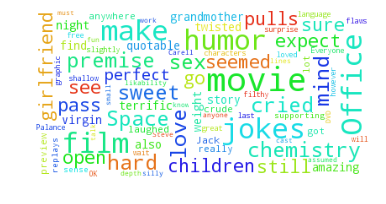

In [45]:
from wordcloud import WordCloud
# Generate a word cloud image for the Positive Sample review 
# taking relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color="white", relative_scaling=.5).generate(pos_review_train_sample)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

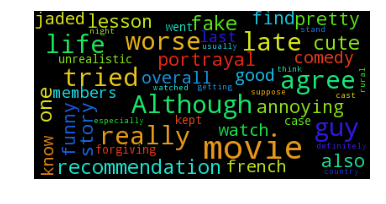

In [46]:
# Generate a word cloud image for the Positive Sample review 
# taking relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(neg_review_train_sample)
plt.imshow(wordcloud)
plt.axis("off")

In [47]:
# After assigning sentiment to each review on unlabeled train data
# I can merge it with the train data
# and see the difference on predicting the reviews for the test data
# with the model using train data, and combined training data + new labeled data


# I can graph sentiment vs word count on review
# positive and negative

# Infering if reviewer is adult or child depending on lexical variation

In [48]:
# Running Tokenize Words for Sample Reviews
nltk.word_tokenize(pos_review_train_sample)
nltk.word_tokenize(neg_review_train_sample)

#type(nltk.word_tokenize(neg_review_train_sample))
#type(nltk.word_tokenize(pos_review_train_sample))

['``',
 'I',
 'watched',
 'this',
 'movie',
 'really',
 'late',
 'last',
 'night',
 'and',
 'usually',
 'if',
 'it',
 "'s",
 'late',
 'then',
 'I',
 "'m",
 'pretty',
 'forgiving',
 'of',
 'movies',
 '.',
 'Although',
 'I',
 'tried',
 ',',
 'I',
 'just',
 'could',
 'not',
 'stand',
 'this',
 'movie',
 'at',
 'all',
 ',',
 'it',
 'kept',
 'getting',
 'worse',
 'and',
 'worse',
 'as',
 'the',
 'movie',
 'went',
 'on',
 '.',
 'Although',
 'I',
 'know',
 'it',
 "'s",
 'suppose',
 'to',
 'be',
 'a',
 'comedy',
 'but',
 'I',
 'did',
 "n't",
 'find',
 'it',
 'very',
 'funny',
 '.',
 'It',
 'was',
 'also',
 'an',
 'especially',
 'unrealistic',
 ',',
 'and',
 'jaded',
 'portrayal',
 'of',
 'rural',
 'life',
 '.',
 'In',
 'case',
 'this',
 'is',
 'what',
 'any',
 'of',
 'you',
 'think',
 'country',
 'life',
 'is',
 'like',
 ',',
 'it',
 "'s",
 'definitely',
 'not',
 '.',
 'I',
 'do',
 'have',
 'to',
 'agree',
 'that',
 'some',
 'of',
 'the',
 'guy',
 'cast',
 'members',
 'were',
 'cute',
 ',',
 '

In [49]:
#Following example from class hamlet_tex_obj = nltk.Text(nltk.corpus.gutenberg.words("shakespeare-hamlet.txt"))
pos_review_text_obj = nltk.Text(nltk.word_tokenize(pos_review_train_sample))
neg_review_text_obj = nltk.Text(nltk.word_tokenize(neg_review_train_sample))

Displaying 2 of 2 matches:
ot of shallow make-fun-of-the-virgin humor . What a great surprise . I laughed 
mind and a slightly twisted sense of humor . OK ... ..this is not a movie to go
make-fun-of-the-virgin_. of_.



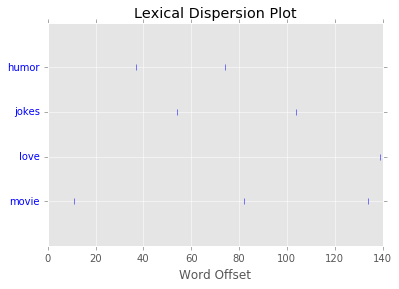

In [50]:
pos_review_text_obj.concordance('humor')
pos_review_text_obj.common_contexts(['humor'])
pos_review_text_obj.similar('humor')
pos_review_text_obj.dispersion_plot(['humor', 'jokes', 'love', 'movie'])

Displaying 2 of 2 matches:
 I 'm pretty forgiving of movies . Although I tried , I just could not stand t
e and worse as the movie went on . Although I know it 's suppose to be a comed
._i
No matches


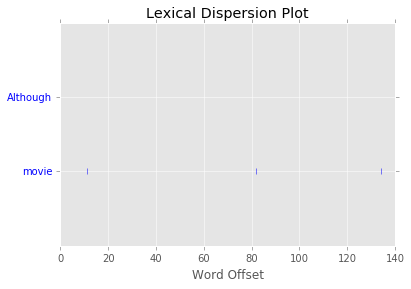

In [51]:
neg_review_text_obj
neg_review_text_obj.concordance('Although')
neg_review_text_obj.common_contexts(['Although'])
pos_review_text_obj.similar('Although')
pos_review_text_obj.dispersion_plot(['Although', 'movie'])

In [52]:
# Running Tokenize Sentences for Sample Reviews
nltk.sent_tokenize(pos_review_train_sample)[4]
nltk.sent_tokenize(pos_review_train_sample)
nltk.sent_tokenize(neg_review_train_sample)[4]
nltk.sent_tokenize(neg_review_train_sample)
#type(nltk.sent_tokenize(neg_review_train_sample))
#type(nltk.sent_tokenize(pos_review_train_sample))

#Cannot do the following?
#nltk.corpus.gutenberg.sents(positive_review_train_data)
#nltk.corpus.gutenberg.words(neg_review_train_sample)

#List of list for sentences in Sample Reviews
#[nltk.word_tokenize(s) for s in nltk.sent_tokenize(pos_review_train_sample)]
#[nltk.word_tokenize(s) for s in nltk.sent_tokenize(neg_review_train_sample)]

['"I watched this movie really late last night and usually if it\'s late then I\'m pretty forgiving of movies.',
 'Although I tried, I just could not stand this movie at all, it kept getting worse and worse as the movie went on.',
 "Although I know it's suppose to be a comedy but I didn't find it very funny.",
 'It was also an especially unrealistic, and jaded portrayal of rural life.',
 "In case this is what any of you think country life is like, it's definitely not.",
 'I do have to agree that some of the guy cast members were cute, but the french guy was really fake.',
 'I do have to agree that it tried to have a good lesson in the story, but overall my recommendation is that no one over 8 watch it, it\'s just too annoying."']

In [53]:
# Sentiment analysis of Sample Positive Review
pos_review_train_sample_t = textblob.TextBlob(pos_review_train_sample)
pos_review_train_sample_t.sentiment

Sentiment(polarity=0.10977272727272727, subjectivity=0.651010101010101)

In [54]:
# Sentiment analysis of Sample Negative Review
neg_review_train_sample_t = textblob.TextBlob(neg_review_train_sample)
neg_review_train_sample_t.sentiment

Sentiment(polarity=-0.1203125, subjectivity=0.5916666666666667)

In [55]:
neg_review_train_sample_t.words

WordList(['I', 'watched', 'this', 'movie', 'really', 'late', 'last', 'night', 'and', 'usually', 'if', 'it', "'s", 'late', 'then', 'I', "'m", 'pretty', 'forgiving', 'of', 'movies', 'Although', 'I', 'tried', 'I', 'just', 'could', 'not', 'stand', 'this', 'movie', 'at', 'all', 'it', 'kept', 'getting', 'worse', 'and', 'worse', 'as', 'the', 'movie', 'went', 'on', 'Although', 'I', 'know', 'it', "'s", 'suppose', 'to', 'be', 'a', 'comedy', 'but', 'I', 'did', "n't", 'find', 'it', 'very', 'funny', 'It', 'was', 'also', 'an', 'especially', 'unrealistic', 'and', 'jaded', 'portrayal', 'of', 'rural', 'life', 'In', 'case', 'this', 'is', 'what', 'any', 'of', 'you', 'think', 'country', 'life', 'is', 'like', 'it', "'s", 'definitely', 'not', 'I', 'do', 'have', 'to', 'agree', 'that', 'some', 'of', 'the', 'guy', 'cast', 'members', 'were', 'cute', 'but', 'the', 'french', 'guy', 'was', 'really', 'fake', 'I', 'do', 'have', 'to', 'agree', 'that', 'it', 'tried', 'to', 'have', 'a', 'good', 'lesson', 'in', 'the', '

In [56]:
pos_review_train_sample_t.words

WordList(['I', 'got', 'a', 'free', 'pass', 'to', 'a', 'preview', 'of', 'this', 'movie', 'last', 'night', 'and', 'did', "n't", 'know', 'what', 'to', 'expect', 'The', 'premise', 'seemed', 'silly', 'and', 'I', 'assumed', 'it', 'would', 'be', 'a', 'lot', 'of', 'shallow', 'make-fun-of-the-virgin', 'humor', 'What', 'a', 'great', 'surprise', 'I', 'laughed', 'so', 'hard', 'I', 'cried', 'at', 'some', 'of', 'the', 'jokes', 'This', 'film', 'is', 'a', 'must', 'see', 'for', 'anyone', 'with', 'an', 'open', 'mind', 'and', 'a', 'slightly', 'twisted', 'sense', 'of', 'humor', 'OK', 'this', 'is', 'not', 'a', 'movie', 'to', 'go', 'to', 'with', 'your', 'grandmother', 'Jack', 'Palance', 'or', 'small', 'children', 'The', 'language', 'is', 'filthy', 'the', 'jokes', 'are', 'very', 'crude', 'and', 'the', 'sex', 'talk', 'is', 'about', 'as', 'graphic', 'as', 'you', "'ll", 'find', 'anywhere', 'What', "'s", 'amazing', 'however', 'is', 'that', 'the', 'movie', 'is', 'still', 'a', 'sweet', 'love', 'story', 'My', 'girl

In [57]:
# Intention of this code is to do textblob on each of the reviews

#for x in train_data:
#    train_data.review[x]

#positive_review_train_data.sort_values(by='id')
#house_data.sort_values
#positive_review_train_data['review']
#positive_review_train_data.

#train_data.review[0]

In [58]:
# Function to clear strange characters 
def is_a_real_word(x):
    return x not in ".,[]:!'?&-;()"

In [61]:
# Cleaning Positive Sample Review
cleaned_up_pos_review_train_sample = [
    x.lower() 
        for x in nltk.word_tokenize(pos_review_train_sample)
        if is_a_real_word(x)
]
cleaned_up_pos_review_train_sample

['``',
 'i',
 'got',
 'a',
 'free',
 'pass',
 'to',
 'a',
 'preview',
 'of',
 'this',
 'movie',
 'last',
 'night',
 'and',
 'did',
 "n't",
 'know',
 'what',
 'to',
 'expect',
 'the',
 'premise',
 'seemed',
 'silly',
 'and',
 'i',
 'assumed',
 'it',
 'would',
 'be',
 'a',
 'lot',
 'of',
 'shallow',
 'make-fun-of-the-virgin',
 'humor',
 'what',
 'a',
 'great',
 'surprise',
 'i',
 'laughed',
 'so',
 'hard',
 'i',
 'cried',
 'at',
 'some',
 'of',
 'the',
 'jokes',
 'this',
 'film',
 'is',
 'a',
 'must',
 'see',
 'for',
 'anyone',
 'with',
 'an',
 'open',
 'mind',
 'and',
 'a',
 'slightly',
 'twisted',
 'sense',
 'of',
 'humor',
 'ok',
 '...',
 '..this',
 'is',
 'not',
 'a',
 'movie',
 'to',
 'go',
 'to',
 'with',
 'your',
 'grandmother',
 'jack',
 'palance',
 'or',
 'small',
 'children',
 'the',
 'language',
 'is',
 'filthy',
 'the',
 'jokes',
 'are',
 'very',
 'crude',
 'and',
 'the',
 'sex',
 'talk',
 'is',
 'about',
 'as',
 'graphic',
 'as',
 'you',
 "'ll",
 'find',
 'anywhere',
 'what'

In [62]:
# Cleaning Negative Sample Review
cleaned_up_neg_review_train_sample = [
    x.lower() 
        for x in nltk.word_tokenize(neg_review_train_sample)
        if is_a_real_word(x)
]
cleaned_up_neg_review_train_sample

['``',
 'i',
 'watched',
 'this',
 'movie',
 'really',
 'late',
 'last',
 'night',
 'and',
 'usually',
 'if',
 'it',
 "'s",
 'late',
 'then',
 'i',
 "'m",
 'pretty',
 'forgiving',
 'of',
 'movies',
 'although',
 'i',
 'tried',
 'i',
 'just',
 'could',
 'not',
 'stand',
 'this',
 'movie',
 'at',
 'all',
 'it',
 'kept',
 'getting',
 'worse',
 'and',
 'worse',
 'as',
 'the',
 'movie',
 'went',
 'on',
 'although',
 'i',
 'know',
 'it',
 "'s",
 'suppose',
 'to',
 'be',
 'a',
 'comedy',
 'but',
 'i',
 'did',
 "n't",
 'find',
 'it',
 'very',
 'funny',
 'it',
 'was',
 'also',
 'an',
 'especially',
 'unrealistic',
 'and',
 'jaded',
 'portrayal',
 'of',
 'rural',
 'life',
 'in',
 'case',
 'this',
 'is',
 'what',
 'any',
 'of',
 'you',
 'think',
 'country',
 'life',
 'is',
 'like',
 'it',
 "'s",
 'definitely',
 'not',
 'i',
 'do',
 'have',
 'to',
 'agree',
 'that',
 'some',
 'of',
 'the',
 'guy',
 'cast',
 'members',
 'were',
 'cute',
 'but',
 'the',
 'french',
 'guy',
 'was',
 'really',
 'fake',